In [1]:
import os
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation

from meld_graph.dataset import GraphDataset
from meld_classifier.meld_cohort import MeldCohort

from meld_graph.evaluation import Evaluator
from meld_graph.evaluation import load_prediction
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns




Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350


In [2]:
save_dir = '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-09-12_TEST_optimise_sigmoid'


In [6]:
# load experiment
model_path = '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-18_IFYF_object_save_final/s_0/fold_all'
exp = meld_graph.experiment.Experiment.from_folder(model_path)
exp.data_parameters["augment_data"] = {}

# load sigmoid
sigmoid_file = '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/23-08-39_TEST_optimise_sigmoid/sigmoid_optimal_parameters.csv'

# load trainval dataset
split = "trainval"
subjects = exp.data_parameters["train_ids"] + exp.data_parameters["val_ids"]
subjects = subjects[0:2]
# subjects= ['MELD_H14_3T_FCD_0019', 'MELD_H14_3T_FCD_0017','MELD_H23_15T_FCD_0007',]

features = exp.data_parameters["features"]
cohort = MeldCohort(
        hdf5_file_root=exp.data_parameters["hdf5_file_root"],
        dataset=exp.data_parameters["dataset"],
    )
dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode="test")
    
# create evaluator
eva = Evaluator(
    experiment=exp,
    checkpoint_path=model_path,
    make_images=False,
    dataset=dataset,
    cohort=cohort,
    save_dir=save_dir,
    subject_ids=subjects,
    mode="test",
    threshold=sigmoid_file,
)


Initialised Experiment 23-08-18_IFYF_object_save_final/s_0
Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0035
Z-scoring data for MELD_H21_15T_FCD_0039
Evaluation test, min area threshold=100, threshold sigmoid(ymin=0.03, ymax=0.5, k=1.0, m=0.05)
Creating model
Creating ensemble model
Loading ensemble model weights from checkpoint /rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-18_IFYF_object_save_final/s_0/fold_all/ensemble_model.pt


In [9]:
eva.experiment.experiment_path

'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-08-18_IFYF_object_save_final/s_0/fold_00'

In [7]:
eva.threshold

array([0.03, 0.5 , 1.  , 0.05])

In [5]:
## load prediction from file

subj_id = 'MELD_H17_3T_FCD_0035'
dictio = eva.load_data_from_file(subj_id, 
                                 keys=['result','distance_map','input_labels','input_features'], 
                                 split_hemis=False, 
                                 save_prediction_suffix="_trainval")

Loading and preprocessing test data
Z-scoring data for MELD_H17_3T_FCD_0035


In [6]:
dictio['input_features'].shape

(293804, 34)

In [13]:
save_prediction = True
roc_curves_thresholds = None
suffix = "_trainval"

eva.load_predict_data(
    save_prediction=False,
    roc_curves_thresholds=roc_curves_thresholds,
    save_prediction_suffix=suffix,
)   

loading data and predicting model


In [20]:
eva.data_dictionary['MELD_H17_3T_FCD_0035']

{'input_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'result': array([0.00115602, 0.00094397, 0.0011243 , ..., 0.00667096, 0.00633547,
        0.00591009], dtype=float32),
 'distance_map': array([0.9346576 , 0.94813955, 0.9464396 , ..., 0.45487157, 0.4512147 ,
        0.4527034 ], dtype=float32),
 'borderzone': array([False, False, False, ..., False, False, False]),
 'input_features': array([[-1.1368638 ,  0.50092256,  0.28129432, ...,  0.04365344,
         -0.17264554, -0.65020376],
        [-1.005522  , -0.5925906 , -0.66931605, ..., -0.9619824 ,
         -0.7321275 , -0.5194299 ],
        [-0.26274064, -0.04233593, -0.02707768, ...,  2.0590827 ,
          1.6008804 ,  1.8320981 ],
        ...,
        [ 0.24437492,  1.3761927 ,  1.441075  , ..., -0.0089421 ,
         -0.54479945, -0.8769303 ],
        [ 0.48616728,  1.6734843 ,  1.8314601 , ..., -0.05668959,
         -0.5334632 , -0.7556283 ],
        [ 0.6129601 ,  1.8522564 ,  2.0782573 , ..., -0.18703522,
         -0.62097186, -0.61

In [7]:
save_dir = os.path.join(save_dir,f'fold_all', 'results')

0.01 0.3 1 0.1
0.01 0.3 1 0.05
0.01 0.4 1 0.1
0.01 0.4 1 0.05
0.01 0.5 1 0.1
0.01 0.5 1 0.05
0.03 0.3 1 0.1
0.03 0.3 1 0.05
0.03 0.4 1 0.1
0.03 0.4 1 0.05
0.03 0.5 1 0.1
0.03 0.5 1 0.05
0.05 0.3 1 0.1
0.05 0.3 1 0.05
0.05 0.4 1 0.1
0.05 0.4 1 0.05
0.05 0.5 1 0.1
0.05 0.5 1 0.05


,dice,sensitivity,ymin,ymax,k,m,desc,sum
0,0.595800,0.857143,0.01,0.3,1,0.10,ymin0.01_ymax0.3_k1_m0.1,1.452943
1,0.588525,0.857143,0.01,0.3,1,0.05,ymin0.01_ymax0.3_k1_m0.05,1.445668
2,0.602702,0.857143,0.01,0.4,1,0.10,ymin0.01_ymax0.4_k1_m0.1,1.459845
3,0.617814,0.857143,0.01,0.4,1,0.05,ymin0.01_ymax0.4_k1_m0.05,1.474957
4,0.599250,0.857143,0.01,0.5,1,0.10,ymin0.01_ymax0.5_k1_m0.1,1.456393
5,0.620499,0.857143,0.01,0.5,1,0.05,ymin0.01_ymax0.5_k1_m0.05,1.477642
6,0.617896,0.857143,0.03,0.3,1,0.10,ymin0.03_ymax0.3_k1_m0.1,1.475039
7,0.613694,0.857143,0.03,0.3,1,0.05,ymin0.03_ymax0.3_k1_m0.05,1.470837
8,0.624605,0.857143,0.03,0.4,1,0.10,ymin0.03_ymax0.4_k1_m0.1,1.481748
9,0.638913,0.857143,0.03,0.4,1,0.05,ymin0.03_ymax0.4_k1_m0.05,1.496056


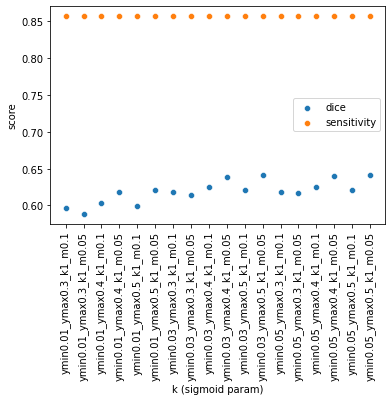

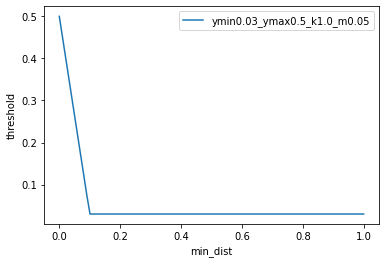

In [9]:
eva.optimise_sigmoid(ymin_r=[0.01,0.03,0.05], ymax_r=[0.3,0.4,0.5], k_r=[1], m_r=[0.1,0.05]) 

In [8]:
# load individual subject predictions 
subjects_dict = eva.data_dictionary
   

In [ ]:
import itertools
import torch
import pandas as pd
from meld_graph.evaluation import sigmoid

from meld_graph.training import tp_fp_fn_tn, dice_coeff

def get_scores(subjects_dict, thresholds):
    """
    return sensitivity & dice for given threshold
    """
    patient_sens = []
    dice = []
    for subj, thresh in zip(subjects_dict, thresholds):
        subj = subjects_dict[subj]

        mask = torch.as_tensor(np.array(subj['result'] >= thresh)).long()
        label = torch.as_tensor(np.array(subj['input_labels'].astype(bool))).long()
        dices = dice_coeff(torch.nn.functional.one_hot(mask, num_classes=2), label)
        #report dice lesional
        dice.append(dices[1])
        #get sensitivity
        tp, fp, fn, tn = tp_fp_fn_tn(mask, label)       
        if sum(subj['input_labels']) != 0:
            patient_sens.append(tp > 1)
    return np.mean(dice), np.mean(patient_sens)

def optimise_sigmoid(min_dist, save_dir, ymin_r=[0.01,0.03,0.05], ymax_r=[0.3,0.4,0.5], k_r=[1], m_r=[0.1,0.05]): 
    """
    Function to find the parameters of the sigmoid used to threshold the predictions based on min_distance
    It returns the ymin, ymax, k and m parameters that find an optimal compromise between sensitivity and dice score

    Args:
        min_dist: the array of min distances of all subjects
        save_dir: the directory to save the csv with the best parameters and plot the sigmoid
        k_r: the range of slopes to try
        m_r: the range of midpoint to try
        ymin_r: the range of min value to try
        ymax_r: the range of max value to try
    """
    
    # calculate threshold as a function of min dist
    res = [] 
    for ymin,ymax,k,m in itertools.product(ymin_r,ymax_r,k_r,m_r):
        print(ymin,ymax,k,m)
        thresholds = sigmoid(np.array(min_dist), k=k, m=m, ymax=ymax, ymin=ymin)
        cur_dice, cur_sens = get_scores(subjects_dict, thresholds)
        res.append({'dice': cur_dice, 'sensitivity': cur_sens,'ymin':ymin, 'ymax':ymax, 'k':k, 'm':m, 'desc':f'ymin{ymin}_ymax{ymax}_k{k}_m{m}'})
    
    df = pd.DataFrame(res)
    
    # plot the results
    ax = sns.scatterplot(data=df, x='desc', y='dice', label='dice') #, 'sensitivity'))
    ax = sns.scatterplot(data=df, x='desc', y='sensitivity', label='sensitivity')
    for tick in ax.xaxis.get_ticklabels():
        tick.set_rotation(90)
    plt.ylabel('score')
    plt.xlabel('k (sigmoid param)')
    plt.legend()

    # find the parameters of the best sigmoid 
    df['sum'] = df['sensitivity'].values + df['dice'].values
    best_dice_sens = df['sum'].max()
    df_best = df[df['sum'] == best_dice_sens]

    #save best parameters
    filename = os.path.join(save_dir,'sigmoid_optimal_parameters.csv')
    df_best.to_csv(filename)

    # plot the selected sigmoid
    plt.figure()
    ymin,ymax,k,m = df_best[['ymin','ymax','k','m']].values[0]
    plt.plot(np.linspace(0,1,100), sigmoid(np.linspace(0,1,100), k=k, m=m, ymax=ymax, ymin=ymin), label=f'ymin{ymin}_ymax{ymax}_k{k}_m{m}')
    plt.ylabel('threshold')
    plt.xlabel('min_dist')
    plt.legend()

    filename = os.path.join(save_dir,'sigmoid_optimal_parameters.png')
    plt.savefig(filename)

    return df

In [ ]:
min_dist = [subjects_dict[subject]['distance_map'].min() for subject in subjects_dict.keys()]
df = optimise_sigmoid(min_dist, save_dir, ymin_r=[0.01,0.03,0.05], ymax_r=[0.2,0.3,0.4,0.5], k_r=[1], m_r=[0.1,0.05])

In [ ]:
df